# Face Detection and  Tracking using OpenCV
---

## Importing the module and loading the Model

In [1]:
# !pip install opencv-python # Run for the first time if we don't have OpenCv
import cv2
face_cascade = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')
print('Model Loaded')

Model Loaded


---
### Tracking the face from sample video

In [ ]:

cap = cv2.VideoCapture('datasets/CERN_Higgs boson_EDIT.mp4')
while True:
# Read the each frame
    ok, img = cap.read()
    if not ok:
        print('Video Ending')
        cap.release()
        cv2.destroyAllWindows()
        break 
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the faces using Cascade Model
    faces = face_cascade.detectMultiScale(gray, 1.1,4)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
       cv2.rectangle(img, (x, y), (x+w, y+h),(0,20,255))
    cv2.imshow('img', img)
    # quit Press Key Q to quit and Close window
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        cap.release()
        cv2.destroyAllWindows()
        break
print('Video Ending')

Video Ending


---
## OCR Using `tesseract`

---

## Importing Modules

In [10]:
# For Linux
# ............
# !sudo apt install tesseract-ocr
# !sudo apt-get install libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn
# !pip install pytesseract tesseract-ocr

# For Windows
# ............
# To install pytesseract model install setup from this link < https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-v5.3.0.20221214.exe >
!pip install pytesseract tesseract-ocr

import requests
import pytesseract
from PIL import Image
from IPython.display import Image as Img, display


---
## Downloading Image from the Open Source

In [11]:

# Provide the URL of the image you want to download here is the sample
image_url = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.xbCiqkLPzjTe005_wUAc8QHaEK%26pid%3DApi&f=1&ipt=cbe2c102d89de27315ad3059c482188eeb76612d7d70ee8db85f6c584cbf7e10&ipo=images'
# Location of the Tesseract to get the Image to Text Model
pytesseract.pytesseract.tesseract_cmd = 'F:\Tesseract-OCR\tesseract.exe'
# Send an HTTP GET request to the image URL
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the filename from the URL
    filename = 'sample-text.jpeg'
    # Save the image content to a file
    with open(filename, 'wb') as file:
        file.write(response.content)
    print(f"Image downloaded successfully as '{filename}'")
else:
    print("Failed to download the image.")


Image downloaded successfully as 'sample-text.jpeg'


---
## Displaying Image and Extracting Text

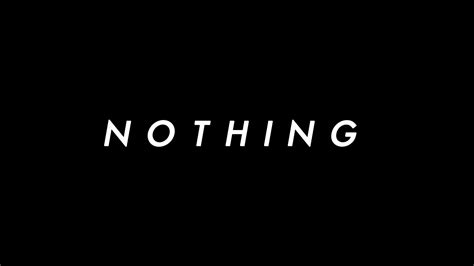

nothing


In [12]:

# Displaying image in notebook regardless of operating system
display(Img(filename='sample-text.jpeg'))
img = Image.open("./sample-text.jpeg")
# Extracting Text from Image
print(pytesseract.image_to_string(img).lower())